In [1]:
import archetypes as arch
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/dataBittner2000.csv")
rownames = pd.read_csv("data/dataBittner2000_rownames.csv", sep=";", header=None).values.tolist()[0]
df.index = rownames
df

,TC-F027,UACC-2873,UACC-1012,UACC-1529,UACC-647,WM1791-C,UACC-827,HA-A,UACC-930,UACC-903,...,UACC-383,UACC-457,M92-001,UACC-2534,UACC-1273,UACC-1256,UACC-502,UACC-091,M91-054,M93-007
G141562,-0.463488,-0.634239,-0.006565,0.892118,-0.212777,-0.258213,1.997741,1.284173,1.466352,-1.564754,...,0.792808,0.339950,1.357231,1.421797,0.786609,0.999456,1.377041,0.565467,0.406149,1.050878
G724112,-0.272579,0.033383,-0.921728,-1.830239,-0.003509,-0.153355,1.480660,1.169463,-1.075289,0.120625,...,1.144402,0.593969,0.146992,1.345995,2.219048,-0.433693,1.095126,1.320644,0.406149,-0.563789
G768357,-0.272579,-0.286873,-0.765000,-3.005818,-0.021648,-0.103196,0.020371,-0.341175,-0.660713,-0.338343,...,-0.317889,-0.200850,-0.179490,0.453360,0.157445,-0.389292,-0.190367,0.196446,0.421821,-0.202176
G79629,-0.042553,-0.548944,-0.954691,-2.389557,-0.562904,-0.573147,-0.146122,0.210562,-0.980040,0.356708,...,-0.167848,-0.640433,-0.018339,-0.383229,-0.256940,-0.597992,-0.554959,0.049862,-0.319923,-0.005941
G490306,-0.931377,-0.413911,-0.485771,-0.536772,-0.192815,-0.551710,-0.510570,-0.688647,-0.858805,-1.293819,...,-0.703934,-0.877620,-0.404022,-0.063821,-0.139885,-0.647722,-0.407925,-0.421002,-0.518487,-0.800943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G359077,0.943030,1.099815,0.342352,1.781344,1.308999,1.211775,0.640670,1.400246,1.893572,0.531114,...,-0.460186,0.882457,1.180406,1.486498,0.877641,1.332483,0.940297,0.460326,1.295822,1.296287
G28410,0.565526,-0.286873,0.166733,1.107842,0.312957,-0.187613,-0.107757,-1.718772,0.525743,-0.032182,...,-1.735699,-0.200850,0.075409,0.510104,-0.813504,-1.167454,0.055867,-0.008063,-0.141004,0.085272
G42677,0.141208,-0.879799,0.471997,0.720821,-0.077081,0.170822,-0.107757,-1.287667,-0.308804,-0.085205,...,-0.764172,-0.062531,0.467037,0.565046,-0.953077,-0.918451,-0.296616,-0.598123,-0.206044,-0.466944
G53185,0.411988,0.966460,1.507877,1.256678,1.757795,0.869790,0.172643,0.913682,0.425731,0.217674,...,-0.340653,0.262410,0.282024,0.907392,0.023263,-0.282706,-0.554959,-0.469996,0.224161,0.442752


In [3]:
model = arch.BiAA(n_archetypes=(3, 2), n_init=2, max_iter=10_000, random_state=0)

In [4]:
_ = model.fit(df)

In [5]:
alphas = pd.DataFrame(model.alphas_)
alphas.index = df.index

a = alphas.idxmax(axis=1)

alphas_names = []
for i in range(model.n_archetypes[0]):
    alphas_names += alphas[a == i].sort_values(i, ascending=False).head(10).index.to_list()

In [6]:
gammas = pd.DataFrame(model.gammas_.T)
gammas.index = df.columns

g = gammas.idxmax(axis=1)

gammas_names = []
for i in range(model.n_archetypes[1]):
    gammas_names += gammas[g == i].sort_values(i, ascending=False).index.to_list()

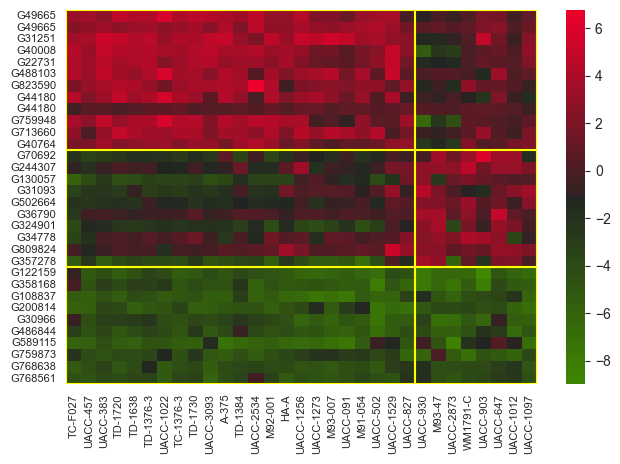

In [7]:
cmap = sns.diverging_palette(120, 10, s=100, center="dark", as_cmap=True)

df_sort = df.loc[alphas_names, gammas_names]

g = sns.heatmap(df_sort, cmap=cmap)

_ = g.set_xticks(np.arange(len(df_sort.columns)) + 0.5)
_ = g.set_xticklabels(df_sort.columns, fontdict={'fontsize': 8})
_ = g.set_yticks(np.arange(len(df_sort.index)) + 0.5)
_ = g.set_yticklabels(df_sort.index, fontdict={'fontsize': 8})

line_color = "yellow"
_ = g.axhline(0, color=line_color)
_ = g.axhline(12, color=line_color)
_ = g.axhline(22, color=line_color)
_ = g.axhline(32, color=line_color)

_ = g.axvline(0, color=line_color)
_ = g.axvline(23, color=line_color)
_ = g.axvline(31, color=line_color)

plt.subplots_adjust(left=0.12, right=1.04, bottom=0.2, top=0.98)

# plt.savefig('results/gene_expression.eps', format='eps')

plt.show()

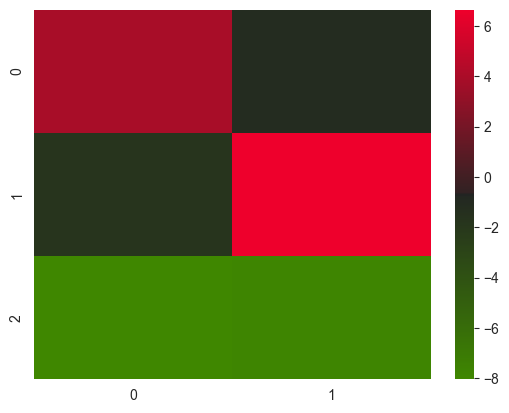

In [8]:
sns.heatmap(model.archetypes_, cmap = cmap)
plt.show()

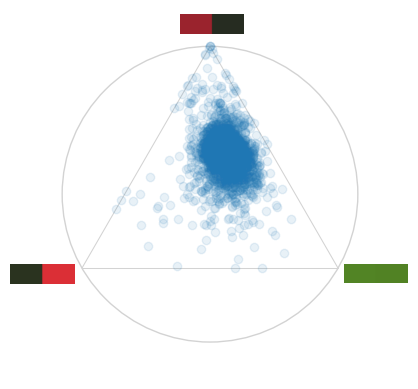

In [9]:
arch.simplex(model.alphas_, alpha=0.1, arch_labels=[""] * 3)
fig = plt.gcf()
newax = fig.add_axes([0.465, 0.77, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/garch0.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')
newax = fig.add_axes([0.2, 0.25, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/garch1.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')
newax = fig.add_axes([0.722, 0.25, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/garch2.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')

# plt.savefig('results/aarch.pdf', format='pdf', bbox_inches="tight")

plt.show()

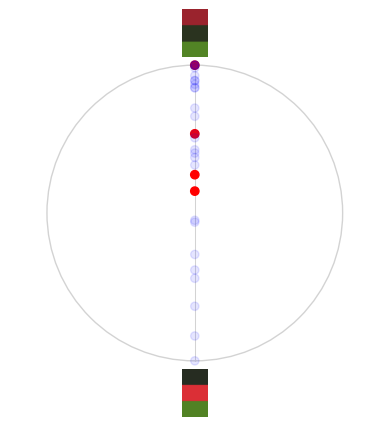

In [12]:
c = ["blue"] * 31
for i in [1, 4, 7, 8]:
    c[i-1] = "red"

al = [0.1] * 31
for i in [1, 4, 7, 8]:
    al[i-1] = 1

arch.simplex(model.gammas_.T, alpha=al, arch_labels=[""] * 2, c=c)

fig = plt.gcf()
newax = fig.add_axes([0.433, 0.82, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/aarch0.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')
newax = fig.add_axes([0.433, 0.07, 0.1, 0.1], anchor='NE', zorder=1)
im = plt.imread('results/aarch1.png') # insert local path of the image.
newax.imshow(im)
newax.axis('off')

# plt.savefig('results/garch.pdf', format='pdf', bbox_inches='tight')

plt.show()